## Part 1: Preprocessing

In [145]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
display(attrition_df.head())
display(attrition_df.shape)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


(1470, 27)

In [146]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [147]:
# Create y_df with the Attrition and Department columns
y = attrition_df[['Attrition', 'Department']]
print(y['Attrition'].value_counts())
print('\n\n')
print(y['Department'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64



Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [148]:
# Create a list of at least 10 column names to use as X data
all_columns = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

selected_columns = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

dropped_columns = [column for column in all_columns if column not in selected_columns]
print(dropped_columns)
# Create X_df using your selected columns
X_df = attrition_df[selected_columns].copy()

# Show the data types for X_df
print(X_df.dtypes)


['JobRole', 'RelationshipSatisfaction']
Age                         int64
BusinessTravel             object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus              object
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


In [149]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=1)

In [150]:
print(len(X_train))
print(len(X_test))

1102
368


In [151]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [152]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary

#ordinally encode business travel
travel_encoder = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])
X_train['BusinessTravel'] = travel_encoder.fit_transform(X_train[['BusinessTravel']])
X_test['BusinessTravel'] = travel_encoder.transform(X_test[['BusinessTravel']])

# one hot encode education field
education_encoder = OneHotEncoder(sparse=False)
education_encoder.fit(X_train[['EducationField']])
X_train_encoded_field = education_encoder.transform(X_train[['EducationField']])
X_test_encoded_field = education_encoder.transform(X_test[['EducationField']])
X_train_encoded_field = pd.DataFrame(X_train_encoded_field, columns=education_encoder.get_feature_names_out())
X_test_encoded_field = pd.DataFrame(X_test_encoded_field, columns=education_encoder.get_feature_names_out())

#one hot encode Job Role
# role_encoder = OneHotEncoder(sparse=False)
# role_encoder.fit(X_train[['JobRole']])
# X_train_encoded_role = role_encoder.transform(X_train[['JobRole']])
# X_test_encoded_role = role_encoder.transform(X_test[['JobRole']])
# X_train_encoded_role = pd.DataFrame(X_train_encoded_role, columns=role_encoder.get_feature_names_out())
# X_test_encoded_role = pd.DataFrame(X_test_encoded_role, columns=role_encoder.get_feature_names_out())


#binary encode overtime
X_train['OverTime'] = X_train['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
X_test['OverTime'] = X_test['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

#one hot encode marital status
marital_encoder = OneHotEncoder(sparse=False)
marital_encoder.fit(X_train[['MaritalStatus']])
X_train_encoded_marital = marital_encoder.transform(X_train[['MaritalStatus']])
X_test_encoded_marital = marital_encoder.transform(X_test[['MaritalStatus']])
X_train_encoded_marital = pd.DataFrame(X_train_encoded_marital, columns=marital_encoder.get_feature_names_out())
X_test_encoded_marital = pd.DataFrame(X_test_encoded_marital, columns=marital_encoder.get_feature_names_out())

# # #drop the original columns
# X_train = X_train.drop(columns=['EducationField', 'JobRole', 'MaritalStatus'])
# X_test = X_test.drop(columns=['EducationField', 'JobRole', 'MaritalStatus'])

# # #concatenate the dataframes
# X_train_encoded = pd.concat([X_train, X_train_encoded_field, X_train_encoded_role, X_train_encoded_marital], axis=1, sort=False)
# X_test_encoded = pd.concat([X_test, X_test_encoded_field, X_test_encoded_role, X_test_encoded_marital], axis=1, sort=False)

# #concatenate the dataframes (testing without role as role can easily be tied back to department)
X_train = X_train.drop(columns=['EducationField', 'MaritalStatus'])
X_test = X_test.drop(columns=['EducationField', 'MaritalStatus'])
X_train_encoded = pd.concat([X_train, X_train_encoded_field, X_train_encoded_marital], axis=1, sort=False)
X_test_encoded = pd.concat([X_test, X_test_encoded_field, X_test_encoded_marital], axis=1, sort=False)


c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [153]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train_encoded)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [154]:
# Create a OneHotEncoder for the Department column
department_encoder = OneHotEncoder(sparse=False)

# Fit the encoder to the training data
department_encoder.fit(y_train[['Department']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_department_encoded = department_encoder.transform(y_train[['Department']])
y_test_department_encoded = department_encoder.transform(y_test[['Department']])

print(len(y_train_department_encoded))
print(len(y_test_department_encoded))

1102
368


c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [155]:
# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse=False)

# Fit the encoder to the training data
attrition_encoder.fit(y_train[['Attrition']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_attrition_encoded = attrition_encoder.transform(y_train[['Attrition']])
y_test_attrition_encoded = attrition_encoder.transform(y_test[['Attrition']])

print(len(y_train_attrition_encoded))
print(len(y_test_attrition_encoded))

1102
368


c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Create, Compile, and Train the Model

In [156]:
# Find the number of columns in the X training data
input_features = X_train_scaled.shape[1]

# Create the input layer
input_layer = layers.Input(shape=input_features, name='input_layer')

# Create at least two shared layers
shared_layer_1 = layers.Dense(units=16, activation='relu', name='shared_layer_1')(input_layer)
shared_layer_2 = layers.Dense(units=8, activation='relu', name='shared_layer_2')(shared_layer_1)

In [157]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden_layer = layers.Dense(units=8, activation='relu', name='department_hidden_layer')(shared_layer_2)

# Create the output layer
department_output_layer = layers.Dense(units=3, activation='softmax', name='department_output_layer')(department_hidden_layer)

In [158]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden_layer = layers.Dense(units=8, activation='relu', name='attrition_hidden_layer')(shared_layer_2)

# Create the output layer
attrition_output_layer = layers.Dense(units=2, activation='sigmoid', name='attrition_output_layer')(attrition_hidden_layer)

In [159]:
# Create the model
model = Model(
    inputs=input_layer,
    outputs=[department_output_layer, attrition_output_layer]
)

# Compile the model
model.compile(
    optimizer='adam',
    loss={
        'department_output_layer': 'categorical_crossentropy',
        'attrition_output_layer': 'binary_crossentropy'
    },
    metrics=['accuracy']
)

# Summarize the model
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 30)]                 0         []                            
                                                                                                  
 shared_layer_1 (Dense)      (None, 16)                   496       ['input_layer[0][0]']         
                                                                                                  
 shared_layer_2 (Dense)      (None, 8)                    136       ['shared_layer_1[0][0]']      
                                                                                                  
 department_hidden_layer (D  (None, 8)                    72        ['shared_layer_2[0][0]']      
 ense)                                                                                      

In [160]:
# Train the model
model.fit(
    X_train_scaled,
    {'department_output_layer': y_train_department_encoded, 'attrition_output_layer': y_train_attrition_encoded},
    epochs=100,
    shuffle=True,
    validation_data=(X_test_scaled, {'department_output_layer': y_test_department_encoded, 'attrition_output_layer': y_test_attrition_encoded}),
    verbose=2
)

Epoch 1/100


35/35 - 1s - loss: 1.7574 - department_output_layer_loss: 0.9944 - attrition_output_layer_loss: 0.7630 - department_output_layer_accuracy: 0.5653 - attrition_output_layer_accuracy: 0.2577 - val_loss: 1.6388 - val_department_output_layer_loss: 0.9283 - val_attrition_output_layer_loss: 0.7105 - val_department_output_layer_accuracy: 0.6060 - val_attrition_output_layer_accuracy: 0.4973 - 1s/epoch - 33ms/step
Epoch 2/100
35/35 - 0s - loss: 1.5703 - department_output_layer_loss: 0.8757 - attrition_output_layer_loss: 0.6947 - department_output_layer_accuracy: 0.6633 - attrition_output_layer_accuracy: 0.6461 - val_loss: 1.5014 - val_department_output_layer_loss: 0.8295 - val_attrition_output_layer_loss: 0.6718 - val_department_output_layer_accuracy: 0.6413 - val_attrition_output_layer_accuracy: 0.7663 - 91ms/epoch - 3ms/step
Epoch 3/100
35/35 - 0s - loss: 1.4240 - department_output_layer_loss: 0.7831 - attrition_output_layer_loss: 0.6409 - department_output_layer_accuracy: 0.6633 - attrition_o

In [161]:
metrics_names = model.metrics_names

In [162]:
# Evaluate the model branches with the testing data
metrics = model.evaluate(X_test_scaled, {'department_output_layer': y_test_department_encoded, 'attrition_output_layer': y_test_attrition_encoded}, verbose=2)

12/12 - 0s - loss: 1.1929 - department_output_layer_loss: 0.7778 - attrition_output_layer_loss: 0.4150 - department_output_layer_accuracy: 0.7255 - attrition_output_layer_accuracy: 0.8451 - 39ms/epoch - 3ms/step


In [163]:
summary_df = pd.DataFrame(metrics).T
summary_df.columns = metrics_names
summary_df

,loss,department_output_layer_loss,attrition_output_layer_loss,department_output_layer_accuracy,attrition_output_layer_accuracy
0,1.192871,0.777826,0.415045,0.725543,0.845109


In [164]:
# Print the accuracy for both department and attrition
print(f"Department Accuracy: {metrics[3]}")
print(f"Attrition Accuracy: {metrics[4]}")

Department Accuracy: 0.7255434989929199
Attrition Accuracy: 0.845108687877655


12/12 [==============================] - 0s 1ms/step


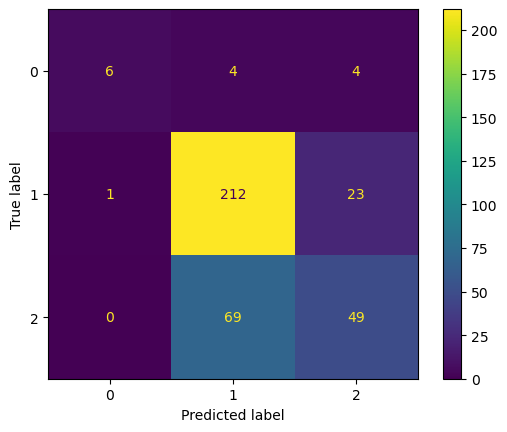

In [165]:
#import confusion matrix   
from sklearn.metrics import ConfusionMatrixDisplay

predictions = model.predict(X_test_scaled)

department_predictions = np.argmax(predictions[0], axis=1)
attrition_predictions = np.round(predictions[1])

#generate confusion matrix for department
department_cm = ConfusionMatrixDisplay.from_predictions(np.argmax(y_test_department_encoded, axis=1), department_predictions)

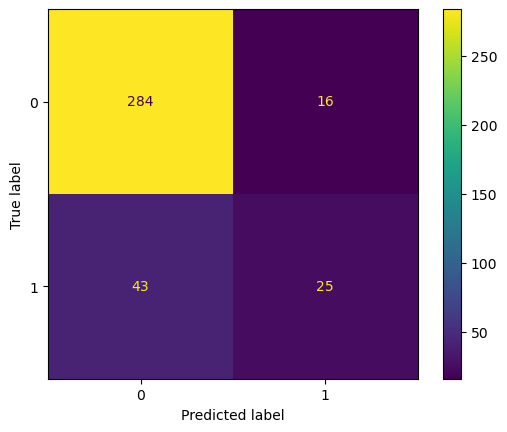

In [166]:
#get confusion matrix for attrition
attrition_cm = ConfusionMatrixDisplay.from_predictions(np.argmax(y_test_attrition_encoded, axis=1), np.argmax(attrition_predictions, axis=1))

# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. Accuracy is probably not the best metric. The data is imbalanced and will present high accuracy values even if the minority class is completely ignored in our predictions. 
2. As department was multiclass, softmax was used. For attrition, a binary class, sigmoid was used.
3. Increasing the amount of data, undersampling or oversampling the training data, and experimenting with different layer configurations